### MegaZebra Data Science Test

### Question 1
__MegaZebra are beta testing an update to a new story reading app.
They can collect data showing how many people start reading a story and how many finish the story. This data can then be used to rank the strength of each story. You are
asked for your opinion on how many players should be in the beta test so that insight regarding the data collected can be considered significant. keep in mind the more players
suggested, the greater the cost to acquire them. How would you suggest to proceed?__

The sample size to perform beta testing largelly depends on whether the test is  one-sample or two-sample [hypothesis testing](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing) and the tracking metrics used to assess the success of the updated version; it can either be assessed on conversion rate (or LTV as it pointed out further into the test questions) in case of two-sample hypothesis testing ([A/B test](https://en.wikipedia.org/wiki/A/B_testing) of the 2 app versions) or it can be assessed on the number of started/finished stories in case of one-sample testing, to name a few options. This will give us a start on which kind of distribution to use  when calculating the sample size, that being in this case either normal distribution in the case of conversion rate(where you can use the mean and standard devition) or binomial distribution/ beta-binomial distribution/Poisson binomial distribution in case of number of started/finished stories.

Further I will focus on the question of sample size for one-sample hypotesis testing:
- how large does a sample need to be so that a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) will be no wider than a given size?
- how large does a sample need to be so that a hypothesis test will have a low [p-value](https://en.wikipedia.org/wiki/P-value) if a certain alternative hypothesis is true?

The next step is to recall methods for inference about proportions, more preciselly confidence intervals formula:

![](confintp.png)

<center>Confidence Interval formula for p</center>

We can then choose the confidence interval and calculculate the critical value ([z*](https://en.wikipedia.org/wiki/Z-test),  [t*](https://en.wikipedia.org/wiki/Student%27s_t-test), or any [relevant value](https://en.wikipedia.org/wiki/Test_statistic)) for the confidence interval; say we want
to have 94% confidence interval and a desired margin error of 8%; p'(1 − p') is maximized here at 0.5 (if the value of p' from the sample turns out to be different, the margin of error will just be a bit smaller, which is even better); the z* value is equal to 1.88, ans so the sample size comes down to n > __130 users__.

Suppose that we wanted a sample size large enough so that we could pick a rejection rule where α was less than 0.05 and the power when p = 0.2 was greater than 0.9; with model X ∼ Binomial(100, p). Playing with this model will make n and rejection rule change so that  α ≤ 0.05 and then find the corresponding power.

For binomial distribution and proportions, the problem is delicated because of the discreteness and necessary sums of binomial
probability calculations. Answering similar problems for normal populations is easier. However, we need to provide a guess 
for σ (standard deviation). Considering again to have 94% confidence interval, a margin error of 5% and σ = 0.20 , form the confidence interval for µ formula we come down to n(sample pupultion) > __57 users__.

![Confidence Interval for µ](mean.png)
                                               
<center>Confidence Interval formula for µ</center>


In [57]:
# sample population calculation example
s=0.2 # std
t=1.88 # critical value
me=0.05 # margin error
n=(s*t/me)**2 # sample population
n

56.550399999999996

Those numbers I chose just to illustrate an example of how to calculate a sample number, they can defenetely be changed and adapted to a situation where we are presented with all the necessasry details.

__Aslo, if the actual cost to acquire more than 30 players (n > 30 is an assumption in [test statistic ](https://en.wikipedia.org/wiki/Test_statistic)) is too high, and the [CLT](https://en.wikipedia.org/wiki/Central_limit_theorem) approximation does not hold, one may take a look at [Student’s t-test](https://en.wikipedia.org/wiki/Student%27s_t-test).__


Further I will load and analize the data contained in .csv tables in order to answer question 2, 3 and 4.

In [3]:
#data manipulation
import numpy as np 
import pandas as pd
from functools import reduce

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

### Load in the data and examine it

For each loaded table I have skipped first 6 and last 11/12 rows that were representing an informative header/summary and was irrelevant to this analysis.

In [4]:
# Read in  data
dateparse = lambda x: pd.datetime.strptime(x, '%H:%M:%S').time()
chapter= pd.read_csv('MZdata/Chapter.csv',skiprows=6,skipfooter=12,engine='python')
funnel= pd.read_csv('MZdata/Funnel.csv', skiprows=6, skipfooter=12,engine='python')
sessions= pd.read_csv('MZdata/Sessions.csv', skiprows=6,skipfooter=12,engine='python',parse_dates=['Date'])
story_continue = pd.read_csv('MZdata/story continue.csv', skiprows=6,skipfooter=12,engine='python')
story_start = pd.read_csv('MZdata/Story start.csv', skiprows=6,skipfooter=12,engine='python')
story_end= pd.read_csv('MZdata/Story end.csv', skiprows=6,skipfooter=12,engine='python')

In [5]:
#Chapter table
#rename the variables to more appropriate python syntax
chapter=chapter.rename(columns = {'Unique Events':'Unique_Ev_chapters'})
chapter.head(3)

,Event Action,story_id,Total Events,Unique_Ev_chapters,Event Value,Avg. Value
0,chapter_start,UnknownNumber,286,101,286,1.0
1,chapter_end,UnknownNumber,243,92,243,1.0
2,chapter_start,WolfenMoon,103,42,103,1.0


In [6]:
# checking whether the data has assigned the correct datatypes
chapter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
Event Action          192 non-null object
story_id              192 non-null object
Total Events          192 non-null int64
Unique_Ev_chapters    192 non-null int64
Event Value           192 non-null int64
Avg. Value            192 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [7]:
#funnel table
#rename the variables to more appropriate python syntax
funnel=funnel.rename(columns = {'Unique Events':'Unique_Ev_funel'})
funnel.head(3)

,Event Action,story_id,Total Events,Unique_Ev_funel,Event Value,Avg. Value
0,chapter1_start,UnknownNumber,75,75,75,1.0
1,UnknownNumber_01_01.00.00_Chat,UnknownNumber,75,75,75,1.0
2,UnknownNumber_01_01.00.00_EmotionChoice_22,UnknownNumber,73,73,73,1.0


In [8]:
# checking whether the data has assigned the correct datatypes
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 6 columns):
Event Action       1224 non-null object
story_id           1224 non-null object
Total Events       1224 non-null int64
Unique_Ev_funel    1224 non-null int64
Event Value        1224 non-null int64
Avg. Value         1224 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 57.5+ KB


In [9]:
#sessions table
sessions.head(3)

,Date,Number of Sessions per User,Avg. Session Duration
0,2019-12-27,2.18,00:16:49
1,2019-12-25,2.13,00:24:20
2,2019-12-26,1.96,00:22:46


In [10]:
sessions['Avg. Session Duration'] =  pd.to_datetime(sessions['Avg. Session Duration'], infer_datetime_format=True)

In [11]:
# checking whether the data has assigned the correct datatypes
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
Date                           8 non-null datetime64[ns]
Number of Sessions per User    8 non-null float64
Avg. Session Duration          8 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 272.0 bytes


In [12]:
#story_continue table
#rename the variables to more appropriate python syntax
story_continue=story_continue.rename(columns = {'Event Label':'story_id'})
story_continue=story_continue.rename(columns = {'Unique Events':'unique_cont_ev'})
story_continue.head(3)


,story_id,Total Events,unique_cont_ev,Event Value,Avg. Value
0,UnknownNumber,94,88,94,1.0
1,WolfenMoon,45,41,45,1.0
2,TattooArtist,31,23,31,1.0


In [13]:
# story_continue table
# checking whether the data has assigned the correct datatypes
story_continue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
story_id          21 non-null object
Total Events      21 non-null int64
unique_cont_ev    21 non-null int64
Event Value       21 non-null int64
Avg. Value        21 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 920.0+ bytes


In [14]:
#story_start table
#rename the variables to more appropriate python syntax
story_start=story_start.rename(columns = {'Event Label':'story_id'})
story_start=story_start.rename(columns = {'Unique Events':'unique_start_ev'})
story_start.head(3)

,story_id,Total Events,unique_start_ev,Event Value,Avg. Value
0,UnknownNumber,75,75,75,1.0
1,DiaryofaDominatrix,45,45,45,1.0
2,WolfenMoon,30,30,30,1.0


In [15]:
# checking whether the data has assigned the correct datatypes
story_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
story_id           23 non-null object
Total Events       23 non-null int64
unique_start_ev    23 non-null int64
Event Value        23 non-null int64
Avg. Value         23 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1000.0+ bytes


In [16]:
#story_end table
#rename the variables to more appropriate python syntax
story_end=story_end.rename(columns = {'Event Label':'story_id'})
story_end=story_end.rename(columns = {'Unique Events':'unique_end_ev'})
story_end.head(3)

,story_id,Total Events,unique_end_ev,Event Value,Avg. Value
0,DiaryofaDominatrix,20,20,20,1.0
1,UnknownNumber,14,14,14,1.0
2,WolfenMoon,12,12,12,1.0


In [17]:
# checking whether the data has assigned the correct datatypes
story_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
story_id         21 non-null object
Total Events     21 non-null int64
unique_end_ev    21 non-null int64
Event Value      21 non-null int64
Avg. Value       21 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 920.0+ bytes


In [18]:
#story_sel table
# loading the rest of the tables
story_sel = pd.read_csv('MZdata/Story selection.csv', skiprows=6,skipfooter=12,engine='python')
story_replay= pd.read_csv('MZdata/story replay.csv', skiprows=6, skipfooter=12,engine='python')
User_Revenue = pd.read_csv('MZdata/User & Revenue.csv', skiprows=6, skipfooter=12,engine='python',parse_dates=['Date'])

In [19]:
#rename the variables to more appropriate python syntax
story_sel=story_sel.rename(columns = {'Event Label':'story_id'})
story_sel=story_sel.rename(columns = {'Unique Events':'unique_sel_ev'})
story_sel.head(3)

,story_id,Total Events,unique_sel_ev,Event Value,Avg. Value
0,UnknownNumber,185,149,185,1.0
1,DiaryofaDominatrix,111,98,111,1.0
2,Cupido,101,82,101,1.0


In [20]:
# checking whether the data has assigned the correct datatypes
story_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
story_id         23 non-null object
Total Events     23 non-null int64
unique_sel_ev    23 non-null int64
Event Value      23 non-null int64
Avg. Value       23 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1000.0+ bytes


In [21]:
# story_replay table
#rename the variables to more appropriate python syntax
story_replay=story_replay.rename(columns = {'Event Label':'story_id'})
story_replay=story_replay.rename(columns = {'Unique Events':'unique_replay_ev'})
story_replay.head(3)

,story_id,Total Events,unique_replay_ev,Event Value,Avg. Value
0,WolfenMoon,3,3,3,1.0
1,UnknownNumber,2,2,2,1.0
2,BeMineAgain,1,1,1,1.0


In [22]:
# checking whether the data has assigned the correct datatypes
story_replay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
story_id            8 non-null object
Total Events        8 non-null int64
unique_replay_ev    8 non-null int64
Event Value         8 non-null int64
Avg. Value          8 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 400.0+ bytes


In [23]:
# User_Revenue table
User_Revenue.head(3)

,Date,Users,Product Revenue,Revenue per User
0,2019-12-24,187,US$12.31,US$0.07
1,2019-12-25,47,US$1.06,US$0.02
2,2019-12-26,27,US$0.00,US$0.00


In [24]:
#rename the variables to more appropriate python syntax
User_Revenue=User_Revenue.rename(columns = {'Revenue per User':'Revenue_per_User'})
User_Revenue=User_Revenue.rename(columns = {'Product Revenue':'Product_Revenue_USD'})
#substracting the "US$" so I can manipulate the numbers in the rows later on
User_Revenue['Product_Revenue_USD'] = User_Revenue['Product_Revenue_USD'].map(lambda x: x.lstrip('US$'))
User_Revenue['Revenue_per_User'] = User_Revenue['Revenue_per_User'].map(lambda x: x.lstrip('US$'))

In [25]:
User_Revenue

,Date,Users,Product_Revenue_USD,Revenue_per_User
0,2019-12-24,187,12.31,0.07
1,2019-12-25,47,1.06,0.02
2,2019-12-26,27,0.00,0.00
3,2019-12-27,22,0.00,0.00
4,2019-12-28,15,0.00,0.00
5,2019-12-29,15,0.00,0.00
6,2019-12-31,13,0.00,0.00
7,2019-12-30,11,0.00,0.00


In [26]:
# checking whether the data has assigned the correct datatypes
User_Revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
Date                   8 non-null datetime64[ns]
Users                  8 non-null int64
Product_Revenue_USD    8 non-null object
Revenue_per_User       8 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 336.0+ bytes


### Question 2

__Among the most engaged users, find patterns to determine as early as possible, if somebody will become a dedicated player or not. The earlier the better. Explain why and what you came up with.__

Unfortunatelly, to be able to point at which users are the most engaged, I need to have some individual users logs that contain the user_id nd more detailed activity such as the story_id started, finished, money spent and so on.

From the __User_Revenue table__  I can only say that before holydays (Christmas) there are more players active than during the holydays, which is normal due to the fact that people tend to spend their time different during these times. I can't deschiper any other playing or spending behaviour based on this information.

An example of tentative star schema(also known as dimensional modeling) that would be necessary in order to give a specific answer to the above question would be:

- user table
- chapter table
- start_story table
- end_story table
- session table


![](ss.png)


Having these tables, one can perform aggregate statistics based on each player's id and story_id and determine how many stories&chapters has started/finished, how many sessions has per day/week/month and what is the average session time, money spent etc.

Tentativelly, the most engaged players would be the ones with a large number of sessions and session time per day/week and a constant log-in behaviour (same amount of time spent every day/week/month), a high number of finished chapters that will eventually lead to revenue.

To be able to classify a player as engaged as early as possible such that marketing promotions can target and retain them, they need to show a predictable behaviour, i.e. show a constant playing behavior daily, weekly or montly, depending on what segmentation is desired.



However, we could also directly target (online ads/personlaized campaigns offering bunddles or other incentives in-story) players that read the most engaging/popular story. We can find the most popular story by aggregating unique events from tables related to story activities and merge them in one dataframe for further analysis.

We will further see that the most popular story is the one that is the most read and brings the most of revenue.

In [58]:
# performing aggregations on tables related to stories and chapter events so I can merge them into one dataframe
chapter_ev=chapter.groupby(['story_id'],as_index=False).agg({'Unique_Ev_chapters': lambda x: x.sum()})
funnel_ev=funnel.groupby(['story_id'],as_index=False).agg({'Unique_Ev_funel': lambda x: x.sum()}) 
story_sel_ev=story_sel.groupby(['story_id'],as_index=False).agg({'unique_sel_ev': lambda x: x.sum()}) 
story_start_ev=story_start.groupby(['story_id'],as_index=False).agg({'unique_start_ev': lambda x: x.sum()}) 
story_continue_ev=story_continue.groupby(['story_id'],as_index=False).agg({'unique_cont_ev': lambda x: x.sum()}) 
story_replay_ev=story_replay.groupby(['story_id'],as_index=False).agg({'unique_replay_ev': lambda x: x.sum()})
story_end_ev=story_end.groupby(['story_id'],as_index=False).agg({'unique_end_ev': lambda x: x.sum()}) 

In [59]:
# compile the list of dataframes wanted to merge
data_frames = [chapter_ev, funnel_ev, story_sel_ev, story_start_ev, story_continue_ev, story_replay_ev, story_end_ev]

# merge/join the dataframes & fill the values that don't exist in the lines of merged dataframe with 0
data = reduce(lambda  left,right: pd.merge(left,right,on=['story_id'],
                                            how='outer'), data_frames).fillna('0')
data.head(5)


,story_id,Unique_Ev_chapters,Unique_Ev_funel,unique_sel_ev,unique_start_ev,unique_cont_ev,unique_replay_ev,unique_end_ev
0,Assassin,92,753,47,12,17,0,4
1,BeMineAgain,26,142,21,7,4,1,5
2,BoundToHappen,25,95,34,6,5,0,4
3,CasinoHeist,5,70,18,2,1,0,1
4,Cupido,131,1348,82,21,20,1,9


Text(0.5,1,'Stories popularity')

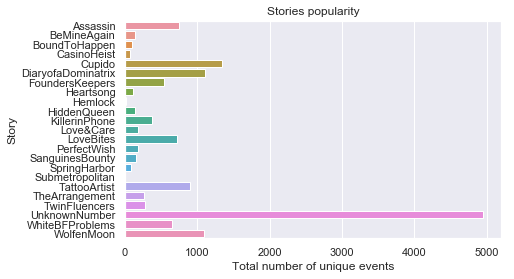

In [60]:
# plot for most popular story
sns.set_style('whitegrid')
sns.set(font_scale=1)
ax = sns.barplot(x="Unique_Ev_funel", y="story_id", data=data)
ax.set_xlabel('Total number of unique events')
ax.set_ylabel("Story")
ax.set_title("Stories popularity")

__As per the plot from above and corresponding table, the story that has the highest registered activity (chapter events, story selection, read and finished)/popularity is UnknownNumber.__

### Question 3

__Assume that the only source of income are videos ads which are viewed after 3 chapters
by all users. CPM is $10 for those video ads. What would a current LTV (actual numbers) be
and what is a predicted one, if we continue to add chapters?__

I will consider as finished the chapters containing number 3 and 6 in their title, as there is no specific
link between the story_id to the chapter number and a specific event code referred above in the star schema as code_id (2=finished, 1=started, 3=continued, 4=unlocked, 5=resumed, etc.) that reflects the exact situation. 

Also, I have considered that players can see video ads after every 3 chapters read. 


To be mentioned that some stories' chapters have no numbers whatsoever, are just specified as "chapter_start", "chapter_end" and "chapter_backToStory".

__I have not considered these events in my computations due to the fact that I am not sure to which chapters they are referring. 
So the numbers illustrated in graphs do not necessary reflect the real situation.__

In [34]:
# cost per mille= 10 USD per 1000 users
CPM=10/1000

In [35]:
# rename the Event Action to more appropriate python syntax
chapter=chapter.rename(columns = {'Event Action':'Event_Action'})

In [46]:
# dataframe that contains reads of first 3 chapters of any listed story and their corresponding LTV
revenue_chapter3 =chapter[chapter['Event_Action'].astype(str).str.contains('03')].groupby(chapter['story_id']).sum()
revenue_chapter3=revenue_chapter3.rename(columns = {'Total Events':'total_ev_ch3'})
revenue_chapter3.drop(['Unique_Ev_chapters','Event Value', 'Avg. Value'], axis=1, inplace = True)
revenue_chapter3['LTV_03_usd'] = revenue_chapter3['total_ev_ch3']*CPM
revenue_chapter3.reset_index(inplace = True) 
revenue_chapter3.head(3)

,story_id,total_ev_ch3,LTV_03_usd
0,Assassin,8,0.08
1,BeMineAgain,8,0.08
2,BoundToHappen,4,0.04


In [47]:
# dataframe that contains reads of first 6 chapters of any listed story and their corresponding LTV
revenue_chapter6 =chapter[chapter['Event_Action'].astype(str).str.contains('06')].groupby(chapter['story_id']).sum()
revenue_chapter6=revenue_chapter6.rename(columns = {'Total Events':'total_ev_ch6'})
revenue_chapter6.drop(['Unique_Ev_chapters','Event Value', 'Avg. Value'], axis=1, inplace = True)
revenue_chapter6['LTV_06_usd'] = revenue_chapter6['total_ev_ch6']*CPM
revenue_chapter6.reset_index(inplace = True)
revenue_chapter6

,story_id,total_ev_ch6,LTV_06_usd
0,Assassin,4,0.04
1,Cupido,10,0.10
2,UnknownNumber,23,0.23


In [48]:
# current LTV (in USD) from reads of first 3 or 6 chapters of any listed story
actual_LTV = sum(revenue_chapter3.LTV_03_usd)+ sum(revenue_chapter6.LTV_06_usd)
actual_LTV

2.5600000000000005

__We could consider as a part of future income an addition of chapters (up to another 3 chapters) to those stories that
have 3 chapters already read. In that case, the future income would be equal to the one coming from stories with only 3 chapters read minus the stories which already have 6 chapters read.__

In [49]:
# number of reads from chapter 3 to chapter 6 for future LTV
f_number=sum(revenue_chapter3.total_ev_ch3) - sum(revenue_chapter6.total_ev_ch6)
# future LTV from users that are left to read from chapter 3 to chapter 6 in USD
f1_LTV=f_number*CPM
f1_LTV

1.82

In [40]:
# compile the list of dataframes wanted to merge
data_frames = [revenue_chapter3, revenue_chapter6]

# merge/join the dataframes & fill the values that don't exist in the lines of merged dataframe with 0
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['story_id'],
                                            how='outer'), data_frames).fillna('0')

# rename the variables to more appropriate python syntax
df_merged["total_ev_ch6"] = pd.to_numeric(df_merged["total_ev_ch6"])
df_merged["LTV_06_usd"] = pd.to_numeric(df_merged["LTV_06_usd"])
df_merged['predicted_LTV'] = (df_merged['total_ev_ch3'] - df_merged['total_ev_ch6'])*CPM
df_merged.head(3)

,story_id,total_ev_ch3,LTV_03_usd,total_ev_ch6,LTV_06_usd,predicted_LTV
0,Assassin,8,0.08,4.0,0.04,0.04
1,BeMineAgain,8,0.08,0.0,0.00,0.08
2,BoundToHappen,4,0.04,0.0,0.00,0.04


Text(0.5,1,'Current LTV (in USD) from reads of first 3 chapters')

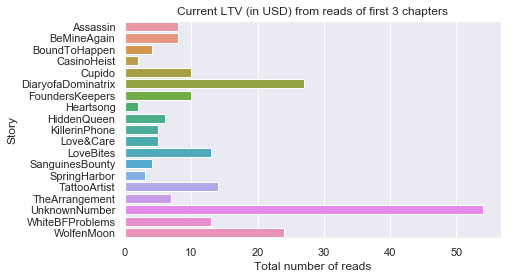

In [61]:
# plot for LTV from reads of first 3 chapters
sns.set_style('whitegrid')
sns.set(font_scale=1)
ax = sns.barplot(x="total_ev_ch3", y="story_id", data=df_merged)
ax.set_xlabel('Total number of reads')
ax.set_ylabel("Story")
ax.set_title("Current LTV (in USD) from reads of first 3 chapters")

__As per the plot from above and corresponding table, the most read story's first 3 chapters is UnknownNumber with more than
50 reads, followed by DiaryofaDominatrix up to 30 reads.__

Text(0.5,1,'Current LTV (in USD) from reads of first 6 chapters')

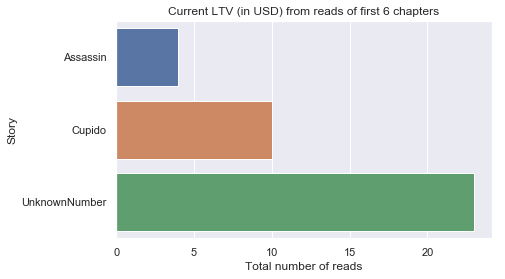

In [63]:
# plot for LTV from reads of first 6 chapters
sns.set_style('whitegrid')
sns.set(font_scale=1)
ax = sns.barplot(x="total_ev_ch6", y="story_id", data=revenue_chapter6)
ax.set_xlabel('Total number of reads')
ax.set_ylabel("Story")
ax.set_title("Current LTV (in USD) from reads of first 6 chapters")

__As per the plot from above and corresponding table, the most read story's first 6 chapters is UnknownNumber with more than 20 reads, followed by Cupido.__

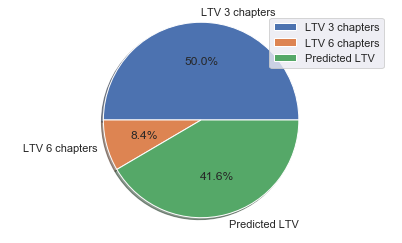

In [64]:
# pie chart of revenue
labels = ['LTV 3 chapters', 'LTV 6 chapters', 'Predicted LTV']
sizes = [df_merged['LTV_03_usd'].sum(),
         df_merged['LTV_06_usd'].sum(),
         df_merged['predicted_LTV'].sum()
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.legend(labels, loc="best")
plt.show()

__As per the plot from above and corresponding table, the revenue coming from viewed ads are mostly from stories that have read the first 3 chapters.__